# Testeo de los modelos entrenados para PQR nivel 2

En este libro se testean los modelos entrandos en el libro PQRnivel2.ipynb. El libro en una primera instancia hace un proprocesamiento de los nuevos registros, esto es seleccionar aquellos registros que provengan de las siguientes fuentes: web y email.Para esto se tomarán las PQR de diciembre y enero dando un total de 741 registros a testear

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dic = pd.read_csv('PQR_2020-12.csv')
data_dic.head()

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafa90,PQR_202012_1,verbal,1093221111,JHONATAN SILVA,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
1,601180ac1d4f1829b8fafa91,PQR_202012_2,verbal,206943,IDARRGA FERNANDI,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
2,601180ac1d4f1829b8fafa92,PQR_202012_3,verbal,52068043,ADRIANA GRANADA,CLL 33 12 16,peticion,101176660,2020/12/18,2021/01/12,...,Santa Rosa,NaN,3.17291e+09,NaN,HER23L15,D23537,U,Residencial,202012,PQR
3,601180ac1d4f1829b8fafa93,PQR_202012_4,verbal,18591705,DARIO MARTINEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR
4,601180ac1d4f1829b8fafa94,PQR_202012_5,telefonico,4583845,ANDRES FELIPE RAMIRES,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR


In [3]:
data_jan = pd.read_csv('PQR_2021-01.csv')
data_jan.head()

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,602866a71d4f183238e145b9,PQR_202101_1,verbal,25161756,ADIELA CARDONA GONZALEZ,CRA 16 18 66 - BARRIO SIN DEFINIR,peticion,101184075,2021/01/19,2021/02/08,...,Santa Rosa,NaN,NaN,NaN,HER23L12,D20299,U,Residencial,202101,PQR
1,602866a71d4f183238e145ba,PQR_202101_2,verbal,206864,RIGOBERTO SANCHEZ,CLL 18 15 25 - BARRIO SIN DEFINIR,peticion,101201209,2021/01/04,2021/01/25,...,Santa Rosa,3.6469e+06,NaN,NaN,HER23L13,D21189,U,Residencial,202101,PQR
2,602866a71d4f183238e145bb,PQR_202101_3,verbal,18591705,RAMON DARIO MARTINEZ GOMEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2021/01/06,2021/01/27,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202101,PQR
3,602866a71d4f183238e145bc,PQR_202101_4,verbal,206840,ANA TULIA SEPULVEDA DE A.,CRA 15 18 63 - BARRIO SIN DEFINIR,peticion,101228526,2021/01/04,2021/01/25,...,Santa Rosa,NaN,NaN,NaN,HER23L12,D20299,U,Residencial,202101,PQR
4,602866a71d4f183238e145bd,PQR_202101_5,verbal,206799,MARIA GOMEZ SOTO GOMEZ,CLL 20 15 15 PSO 2 - BARRIO SIN DEFINIR,peticion,101274963,2021/01/30,2021/02/19,...,Santa Rosa,NaN,3.11739e+09,NaN,HER23L15,D23553,U,Residencial,202101,PQR


In [4]:
df = pd.concat([data_dic, data_jan], ignore_index=True)
df.head()

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafa90,PQR_202012_1,verbal,1093221111,JHONATAN SILVA,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
1,601180ac1d4f1829b8fafa91,PQR_202012_2,verbal,206943,IDARRGA FERNANDI,CRA 16 22 29 - BARRIO SIN DEFINIR,peticion,101106357,2020/12/18,2021/01/12,...,Santa Rosa,3.65663e+06,3.2077e+09,NaN,HER23L15,D23516,U,Residencial,202012,PQR
2,601180ac1d4f1829b8fafa92,PQR_202012_3,verbal,52068043,ADRIANA GRANADA,CLL 33 12 16,peticion,101176660,2020/12/18,2021/01/12,...,Santa Rosa,NaN,3.17291e+09,NaN,HER23L15,D23537,U,Residencial,202012,PQR
3,601180ac1d4f1829b8fafa93,PQR_202012_4,verbal,18591705,DARIO MARTINEZ,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR
4,601180ac1d4f1829b8fafa94,PQR_202012_5,telefonico,4583845,ANDRES FELIPE RAMIRES,CLL 18 15 10 P3 APT 301 - BARRIO SIN DEFINIR,peticion,101212965,2020/12/17,2021/01/11,...,Santa Rosa,3.65790e+06,NaN,NaN,HER23L12,D20303,U,Residencial,202012,PQR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54128 entries, 0 to 54127
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    54128 non-null  object 
 1   ID                     54128 non-null  object 
 2   forma_requerimiento    54128 non-null  object 
 3   identificacion         54128 non-null  int64  
 4   solicitante            54128 non-null  object 
 5   dir_solicitante        54127 non-null  object 
 6   tipo_solicitud         54128 non-null  object 
 7   cuenta                 54128 non-null  int64  
 8   fec_solicitud          54128 non-null  object 
 9   fec_vencmto            54128 non-null  object 
 10  fec_rpta               54128 non-null  object 
 11  clase_inicial          0 non-null      float64
 12  estrato                54128 non-null  object 
 13  a_favor_de             54128 non-null  object 
 14  tipo_solicitud_1       54128 non-null  object 
 15  do

In [6]:
df['forma_requerimiento'].value_counts()

verbal             41173
telefonico         11260
pagina web           600
escrito              477
chat                 253
asesor remoto        189
e-mail               147
terminal sirius       23
portal sac             5
app                    1
Name: forma_requerimiento, dtype: int64

In [7]:
df_test = pd.concat([df[df['forma_requerimiento']=='pagina web'], df[df['forma_requerimiento']=='e-mail']], ignore_index=True)
df_test.head(3)

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafab3,PQR_202012_36,pagina web,21482505,GLORIA PATRICIA CASTAÑO RAMIREZ,CRA 14 29 01 - BARRIO SIN DEFINIR,peticion,102046035,2020/12/01,2020/12/22,...,Santa Rosa,NaN,3.13508e+09,NaN,HER23L15,D23109,U,Comercial,202012,PQR
1,601180ae1d4f1829b8fafb1c,PQR_202012_141,pagina web,18594889,JOSE ALEXANDER RAMIREZ RIVERA,CLL 16 10 35 SUB - BARRIO SIN DEFINIR,peticion,104369423,2020/11/25,2020/12/16,...,Santa Rosa,6.365e+07,3.1044e+09,False,HER23L12,D20366,U,Comercial,202012,PQR
2,601180ae1d4f1829b8fafbe3,PQR_202012_340,pagina web,1093216909,ALEXANDER CORREA,CLL 13 14 30 APT 201 - BARRIO SIN DEFINIR,reclamo,108084591,2020/11/12,2020/12/03,...,Santa Rosa,6.36421e+07,3.13686e+09,NaN,HER23L13,D20605,U,Comercial,202012,PQR


In [8]:
df_test['tipo_solicitud'].value_counts()

peticion                                       467
reclamo                                        104
pedidos/proyectos                              101
queja                                           43
recurso reposicion en subsidio de apelacion     19
recurso de reposicion                            7
programa de financiacion social                  6
Name: tipo_solicitud, dtype: int64

In [9]:
df_test['tipo_solicitud'] = df_test['tipo_solicitud'].map(lambda x: 'recurso' if x=='recurso reposicion en subsidio de apelacion' or x=='recurso de reposicion' else x)
df_test['tipo_solicitud'] = df_test['tipo_solicitud'].map(lambda x: 'peticion' if x=='programa de financiacion social' or x=='autogestion' else x)

In [10]:
df_test['OBSERVACION USUARIO'] = df_test['OBSERVACION USUARIO'].map(lambda x: str(x))
df_test['OBSERVACION USUARIO'] = df_test['OBSERVACION USUARIO'].map(lambda x: x.lower())
len_obs_usuario = [(i, len(o)) for i, o in enumerate(df_test['OBSERVACION USUARIO'])]
len_menor_x = [(i,o) for i, o in sorted(len_obs_usuario, key=lambda t: t[1]) if o <=20]
index_menor_x = [i for i, o in len_menor_x]
len(index_menor_x)

5

In [11]:
df_test['tipo_solicitud'].value_counts()

peticion             473
reclamo              104
pedidos/proyectos    101
queja                 43
recurso               26
Name: tipo_solicitud, dtype: int64

In [12]:
text_nomalization = exec(open("C:\DataLab\datasets\PQR\pqr\_text_nomalization.py", 'rb').read())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df_test['OBSERVACION USUARIO']

0      observaciones: con el fin de acceder a la exen...
1            observaciones: exoneracion de contribucion 
2                                        consumo elevado
3      observaciones: exoneración de contribución de ...
4      observaciones: solicito la exoneracion de cont...
                             ...                        
742    tan amable me comparten una copia de la factur...
743    de acuerdo a las observaciones realizadas por ...
744    amablemente notificamos que el usuario consoli...
745    adjunto documento para solicitud de factibilid...
746        usuario solicita recibo de pago de proyectos.
Name: OBSERVACION USUARIO, Length: 747, dtype: object

In [14]:
text_normalization(df_test['OBSERVACION USUARIO'][737])

'correcciones solicitud idema'

## Testeo del modelo de Peticiones

Se extraeran los registros relacionados con las peticiones

In [17]:
df_test_pet = df_test[df_test['tipo_solicitud']=='peticion']
df_test_pet.head(3)

,_id,ID,forma_requerimiento,identificacion,solicitante,dir_solicitante,tipo_solicitud,cuenta,fec_solicitud,fec_vencmto,...,MUNICIPIO,TELEFONO,CELULAR,EMAIL,CIRCUITO,NODO,UBICACION,CLASE_SERVICIO,ANIOMES,Tipo fuente
0,601180ac1d4f1829b8fafab3,PQR_202012_36,pagina web,21482505,GLORIA PATRICIA CASTAÑO RAMIREZ,CRA 14 29 01 - BARRIO SIN DEFINIR,peticion,102046035,2020/12/01,2020/12/22,...,Santa Rosa,NaN,3.13508e+09,NaN,HER23L15,D23109,U,Comercial,202012,PQR
1,601180ae1d4f1829b8fafb1c,PQR_202012_141,pagina web,18594889,JOSE ALEXANDER RAMIREZ RIVERA,CLL 16 10 35 SUB - BARRIO SIN DEFINIR,peticion,104369423,2020/11/25,2020/12/16,...,Santa Rosa,6.365e+07,3.1044e+09,False,HER23L12,D20366,U,Comercial,202012,PQR
3,601180af1d4f1829b8fafcc0,PQR_202012_561,pagina web,1053833735,JUAN FELIPE RESTREPO PEÑA,CRA 5 13A 22 - BARRIO SIN DEFINIR,peticion,113683768,2020/12/17,2021/01/11,...,Chinchina,8.40013e+06,3.01332e+09,False,CHA23L17,C40345,U,Comercial,202012,PQR


In [18]:
len(df_test_pet)

473

In [19]:
df_test_pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 742
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    473 non-null    object 
 1   ID                     473 non-null    object 
 2   forma_requerimiento    473 non-null    object 
 3   identificacion         473 non-null    int64  
 4   solicitante            473 non-null    object 
 5   dir_solicitante        473 non-null    object 
 6   tipo_solicitud         473 non-null    object 
 7   cuenta                 473 non-null    int64  
 8   fec_solicitud          473 non-null    object 
 9   fec_vencmto            473 non-null    object 
 10  fec_rpta               473 non-null    object 
 11  clase_inicial          0 non-null      float64
 12  estrato                473 non-null    object 
 13  a_favor_de             473 non-null    object 
 14  tipo_solicitud_1       473 non-null    object 
 15  docume

In [20]:
df_test_pet['tipo_solicitud_1'].value_counts()

exencion contribucion                                 173
informacion general                                   113
cambio de datos basicos                                78
trabajos tecnicos en medidores, transformadores, a     23
perjuicios por falla en la prestacion del servicio     20
terminacion del contrato                               16
gestionar financiacion                                  9
poda de arboles                                         6
devolucion o traslado de saldo a favor                  6
requerimiento competencia de otra empresa               5
condicion especial solicitud propietario                5
cambio de uso                                           3
emision de documento para pago                          3
inscripcion, retiro o bloqueo de tarjeta pfs            3
pago parcial                                            2
suspension del servicio                                 2
requerimientos entes oficiales o entidades externa      2
retiro deuda n

In [21]:
df_test_pet['tipo_solicitud_1'] = df_test_pet['tipo_solicitud_1'].map(lambda x: 'otro' if x not in ['emision de documento para pago', 'pago parcial'] else x)

In [22]:
df_test_pet['tipo_solicitud_1'].value_counts()

otro                              468
emision de documento para pago      3
pago parcial                        2
Name: tipo_solicitud_1, dtype: int64

A continuación se hará el testeo del model, vale la pena aclarar la estructura de este modelo:
pipeline compuesto por:
- extracción de características: TF-IDF con unigramas con un limite del 90% de frecuencia de palabras en registros y minimo palabras que estuvieran en 10 registros.
- reducción de dimensiones: SVD reducida a 200 componentes.
- clasificador: SVM con kernel lineal y un parámetro de regularización C=10

In [23]:
import pickle
peticion_clf = pickle.load(open('C:\DataLab\datasets\PQR\pqr\LinearSCV_PQR_2_peticion.sav', 'rb'))

In [26]:
from sklearn import metrics

y_test = df_test_pet['tipo_solicitud_1']
predictions = peticion_clf.predict(df_test_pet['OBSERVACION USUARIO'])

test_acc = metrics.accuracy_score(y_test, predictions)

print(f"El accuracy en validación es de {round(test_acc, 3)}")

El accuracy en validación es de 0.989


In [27]:
print(metrics.classification_report(y_test, predictions))

                                precision    recall  f1-score   support

emision de documento para pago       0.50      0.33      0.40         3
                          otro       0.99      1.00      0.99       468
                  pago parcial       0.00      0.00      0.00         2

                      accuracy                           0.99       473
                     macro avg       0.50      0.44      0.46       473
                  weighted avg       0.98      0.99      0.99       473



Precisión del clasificador: 98.94 

Matriz de Confusión: 
 [[  1   2   0]
 [  1 467   0]
 [  0   2   0]]


<AxesSubplot:>

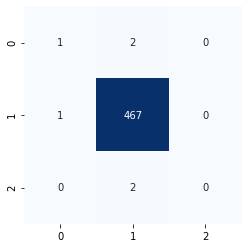

In [28]:
import seaborn as sns

#Calculamos la precisión y mostramos la matriz de confusión
acc = metrics.accuracy_score(y_test, predictions)
mat = metrics.confusion_matrix(y_test, predictions)

print ("Precisión del clasificador: %.2f " %(acc*100.0) )
print ("\nMatriz de Confusión: \n", mat)

#Esta es otra forma de ver la matriz de confusión
sns.heatmap(mat, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")

In [30]:
for r in df_test_pet[df_test_pet['tipo_solicitud_1']=='emision de documento para pago']['OBSERVACION USUARIO']:
    print(r, '\n')


solicito copia del ultimo recibo de energía ya que la bodega fue entregada por nosotros a la inmobiliaria y empapelaron el recibo que debe ser pagado por nosotros. agradezco gestión. quedo atenta  

buena tarde. atentamente solicito a ustedes una copia de la factura de chec correspondiente al servicio de abril 3/2020 a mayo 4/2020. agradezco su atención y colaboración.  

* por favor corregir la última factura ya que me llegó doble y yo cancelé la anterior, para poder realizar el pago virtual. adjunto factura anterior y soportes de pago. muchas gracias.  



In [31]:
peticion_clf.predict([text_normalization('solicito copia del ultimo recibo de energía ya que la bodega fue entregada por nosotros a la inmobiliaria y empapelaron el recibo que debe ser pagado por nosotros. agradezco gestión. quedo atenta')])

array(['otro'], dtype=object)

In [33]:
peticion_clf.predict([text_normalization('buena tarde. atentamente solicito a ustedes una copia de la factura de chec correspondiente al servicio de abril 3/2020 a mayo 4/2020. agradezco su atención y colaboración.')])

array(['otro'], dtype=object)

In [34]:
peticion_clf.predict([text_normalization('* por favor corregir la última factura ya que me llegó doble y yo cancelé la anterior, para poder realizar el pago virtual. adjunto factura anterior y soportes de pago. muchas gracias.')])

array(['otro'], dtype=object)

In [36]:
for r in df_test_pet[df_test_pet['tipo_solicitud_1']=='pago parcial']['OBSERVACION USUARIO']:
    print(r, '\n')

de acuerdo a radicado no. 20200220051883 petición realizada por pagina web, usuario solicita abono de la fra. por valor de 30.000. 

buenas tardes lo que pasa es que nosotros somos arrendatarios y necesitamos pagar el servicio pero la factura del mes pasado no la pudimos pagar por motivos monetarios y requerimos pagar solo una factura pero al realizar el pago nos cobran las dos juntas que pudieramos hacer para cancelar una sola?  



In [37]:
peticion_clf.predict([text_normalization('buenas tardes lo que pasa es que nosotros somos arrendatarios y necesitamos pagar el servicio pero la factura del mes pasado no la pudimos pagar por motivos monetarios y requerimos pagar solo una factura pero al realizar el pago nos cobran las dos juntas que pudieramos hacer para cancelar una sola?')])

array(['otro'], dtype=object)

### Comentarios

A pesar que el rendimiento en el test diga que es del 98% no clasifica las prioridas bien, eso quiere decir que no cumple realmente con la función que se busca de primera mano, que es clasificar por lo menos las prioridades. Se buscará afinar el modelo entrenado usando únicamente las PQR web e email.